In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow import keras
from google.colab import drive
import os

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Tentukan direktori dataset
dataset_dir = '/content/drive/MyDrive/data_bangkit/gigi_depan/'
classes = ['Bukan Gigi', 'Gigi Berlubang', 'Gigi Sehat', 'Perubahan Warna Gigi', 'Radang Gusi']

In [11]:
image_files = []
labels = []

for subdir in os.listdir(dataset_dir):
    subdir_path = os.path.join(dataset_dir, subdir)
    if os.path.isdir(subdir_path) and subdir in classes:
        for file in os.listdir(subdir_path):
            if file.endswith(('.jpg', '.jpeg', '.png')):
                image_files.append(os.path.join(subdir_path, file))
                labels.append(subdir)

In [8]:
import os
import random
import matplotlib.pyplot as plt

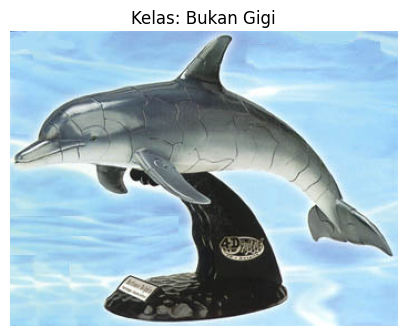

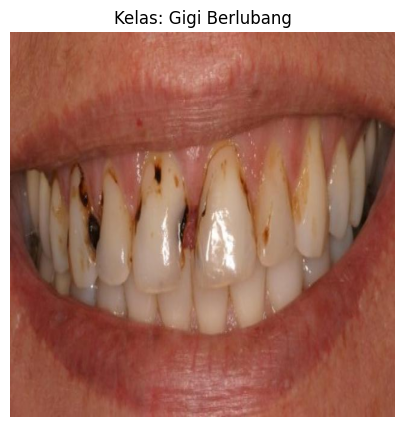

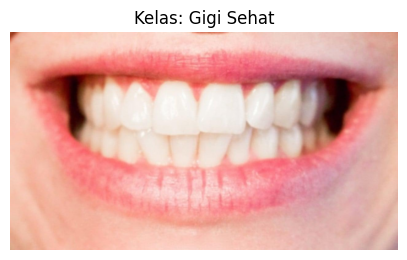

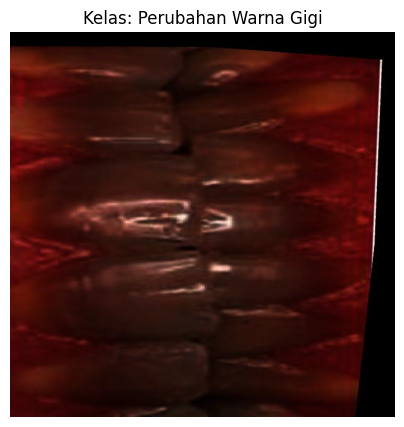

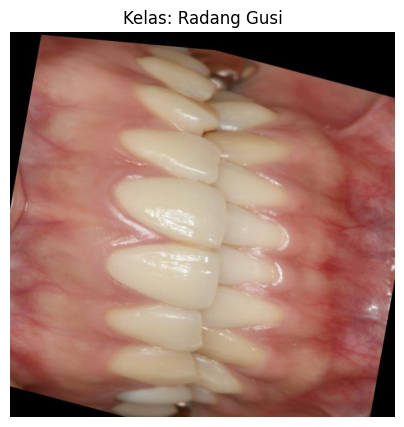

In [12]:
random_images = {}

# Loop untuk setiap kelas
for class_name in classes:
    # Filter image_files berdasarkan kelas
    class_image_files = [img for img, label in zip(image_files, labels) if label == class_name]

    # Pilih satu gambar acak dari kelas tersebut (jika ada)
    if class_image_files:
        random_image_path = random.choice(class_image_files)
        random_images[class_name] = random_image_path

# Tampilkan gambar-gambar yang dipilih
for class_name, image_path in random_images.items():
    img = plt.imread(image_path)
    plt.figure(figsize=(5, 5))  # Atur ukuran gambar sesuai kebutuhan
    plt.imshow(img)
    plt.title(f'Kelas: {class_name}')
    plt.axis('off')  # Sembunyikan sumbu koordinat
    plt.show()

In [13]:
# Parameter dasar
IMG_SIZE = 224
BATCH_SIZE = 64
NUM_CLASSES = len(classes)

# Data generator tanpa augmentasi
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

# Generator untuk training data
train_generator = datagen.flow_from_directory(dataset_dir,
                                              target_size=(IMG_SIZE, IMG_SIZE),
                                              batch_size=BATCH_SIZE,
                                              class_mode='categorical',
                                              subset='training')

# Generator untuk validation data
val_generator = datagen.flow_from_directory(dataset_dir,
                                            target_size=(IMG_SIZE, IMG_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical',
                                            subset='validation')

Found 5805 images belonging to 5 classes.
Found 1932 images belonging to 5 classes.


In [16]:
# Define the CNN model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 64,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 64
)

Epoch 1/30
90/90 [==============================] - 5195s 58s/step - loss: 1.1485 - accuracy: 0.4975 - val_loss: 1.0524 - val_accuracy: 0.5661
Epoch 2/30
90/90 [==============================] - 710s 8s/step - loss: 0.8852 - accuracy: 0.6412 - val_loss: 0.9976 - val_accuracy: 0.5938
Epoch 3/30
90/90 [==============================] - 706s 8s/step - loss: 0.6882 - accuracy: 0.7272 - val_loss: 0.9651 - val_accuracy: 0.6094
Epoch 4/30
90/90 [==============================] - 707s 8s/step - loss: 0.5357 - accuracy: 0.7918 - val_loss: 0.9503 - val_accuracy: 0.6380
Epoch 5/30
90/90 [==============================] - 705s 8s/step - loss: 0.3983 - accuracy: 0.8551 - val_loss: 1.0264 - val_accuracy: 0.6594
Epoch 6/30
90/90 [==============================] - 689s 8s/step - loss: 0.3043 - accuracy: 0.8925 - val_loss: 1.1690 - val_accuracy: 0.6375
Epoch 7/30
90/90 [==============================] - 703s 8s/step - loss: 0.2355 - accuracy: 0.9162 - val_loss: 1.1740 - val_accuracy: 0.6531
Epoch 8/30


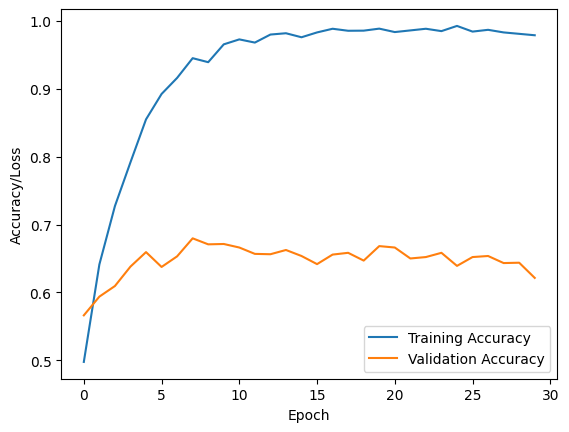

In [25]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')


plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [22]:
# Save the model
model.save('tampak_depan_CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


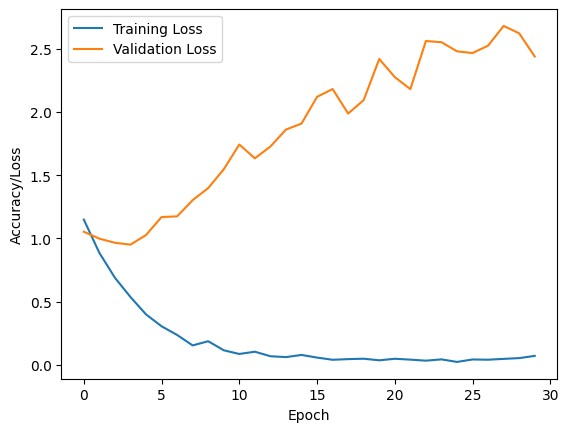

In [27]:


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()
